<a href="https://colab.research.google.com/github/Anuragluckshetty/CODSOFT/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anuragluckshetty
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction


100%|██████████| 262k/262k [00:00<00:00, 290MB/s]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [13]:
df=pd.read_csv("/content/bank-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

le_geo = LabelEncoder()
df['Geography'] = le_geo.fit_transform(df['Geography'])

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

X = df.drop('Exited', axis=1)
y = df['Exited']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



In [17]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [18]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.48      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



In [19]:
print("Accuracy Scores:")
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting:", accuracy_score(y_test, y_pred_gb))

Accuracy Scores:
Logistic Regression: 0.805
Random Forest: 0.865
Gradient Boosting: 0.8675


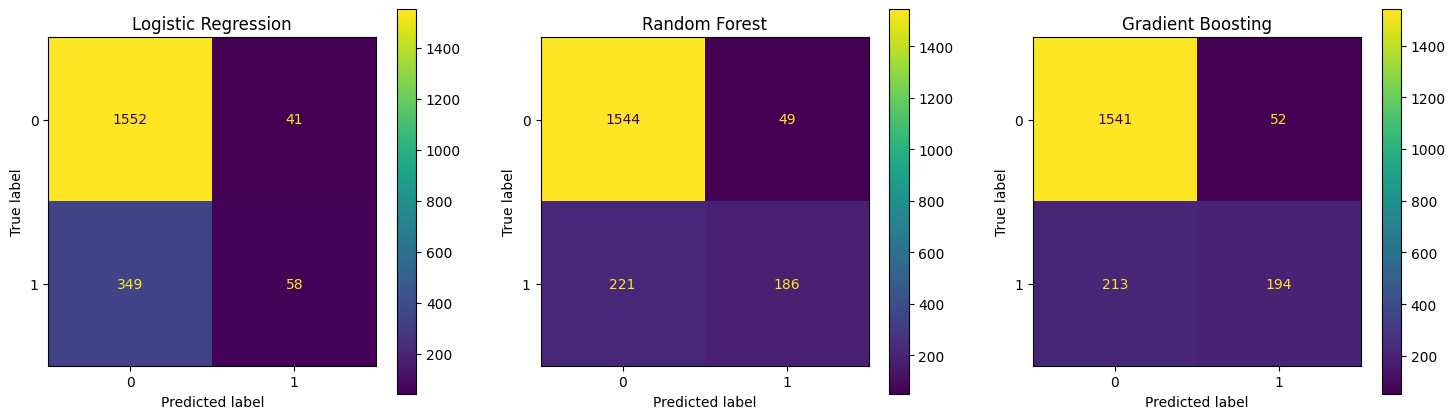

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

models = [("Logistic Regression", y_pred_lr),
          ("Random Forest", y_pred_rf),
          ("Gradient Boosting", y_pred_gb)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, preds) in enumerate(models):
    ConfusionMatrixDisplay.from_predictions(y_test, preds, ax=axes[i])
    axes[i].set_title(name)

plt.show()
